In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\TEMP\Desktop\Portfolio\E-Commerce Store\US  E-commerce records 2020.csv",encoding='latin1')

In [5]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [9]:
#Format Order Date column as a datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d%m%Y %H:%M:%S')

In [10]:
df.describe()

,Order Date,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,2020-07-14 23:33:54.782608896,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
min,2020-01-01 00:00:00,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2020-04-10 18:00:00,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,2020-07-23 00:00:00,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,2020-10-19 00:00:00,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,2020-12-30 00:00:00,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800
std,NaN,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342


Data Exploratory Analysis

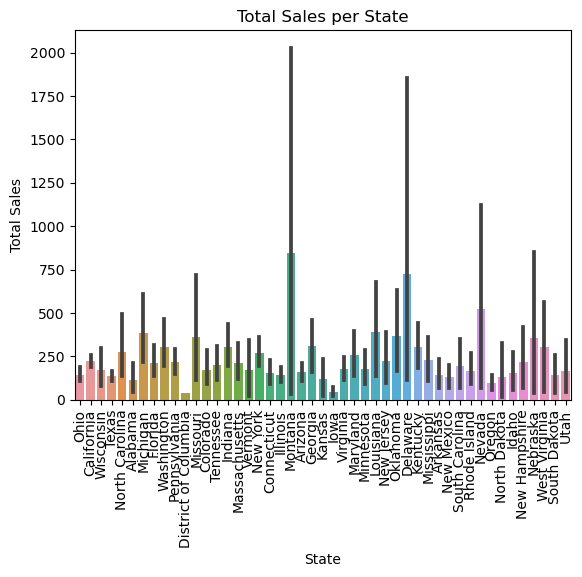

In [18]:
#Exploring the relationship between the state and total sales

total_sales = df.groupby(df['State'])['Sales'].sum()
sns.barplot(df, x='State', y='Sales')
plt.title('Total Sales per State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

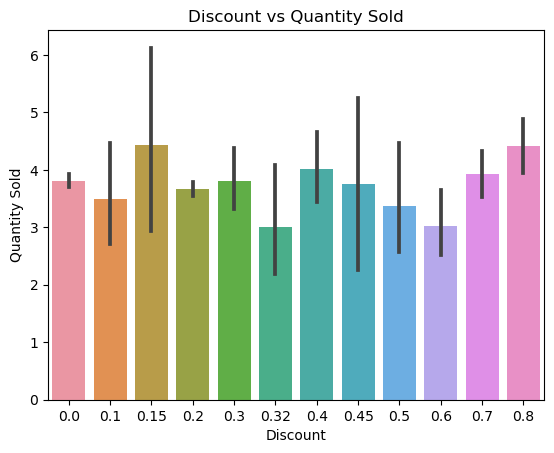

In [25]:
#The relationship between discount and the number of items sold

sns.barplot(df, x='Discount', y='Quantity')
plt.title('Discount vs Quantity Sold')
plt.ylabel('Quantity Sold')
plt.xlabel('Discount')
plt.show()

Text(0, 0.5, 'Sales')

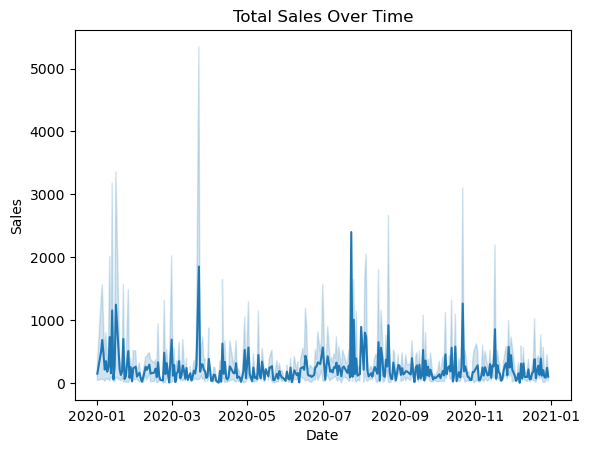

In [26]:
#Totals sales over time
order_date = df.sort_values(['Order Date'])
sns.lineplot(order_date, x='Order Date', y='Sales')
plt.title("Total Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Sales')

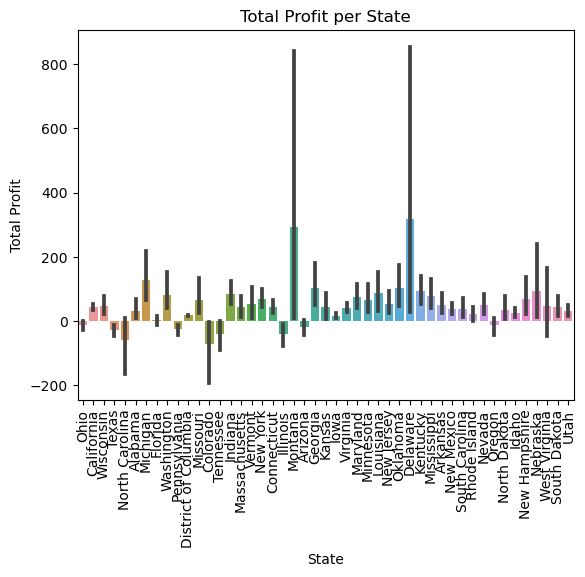

In [27]:
#Which state has the most profit

sns.barplot(df, x='State', y='Profit')
plt.title('Total Profit per State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()

In [31]:
#Top 5 Sub category with the most profit

sub_profit = df.groupby(['Sub-Category'])['Profit'].sum()
print(sub_profit.nlargest(5))

Sub-Category
Copiers        25031.7902
Accessories    15672.3570
Phones         12849.3250
Paper          12040.8434
Appliances      7865.2683
Name: Profit, dtype: float64
